<span style="font-family: Arial; font-weight:bold;font-size:2em;color:#00b3e5;"> iris flower classifiaction 
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Submitted by
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> Shameer.Sutar


Iris flower classification is the task of categorizing iris flowers into different species based on their characteristics.
The objective of Iris flower classification is to develop a model that can accurately categorize iris flowers into their respective species based on specific features.

The most common iris species are:

1) Iris setosa
2) Iris versicolor
3) Iris virginica


The dataset contain the following attributes:

1) Sepel legth in cm
2) Sepal width in cm
3) Petal length in cm
4) Petal width in cm

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> importing libraries </div>

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> importing data
</div>

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
print("Size and shape of each dataframe:")
print("df.csv : {}".format(df.shape))

Size and shape of each dataframe:
df.csv : (150, 6)


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> data type </div>

In [4]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> data info </div>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> value count </div>

In [6]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> five point summary </div>

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> checking for null values </div>

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df. isnull(). sum() * 100 / len(df)

Id               0.0
SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">  data corr </div>

In [10]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


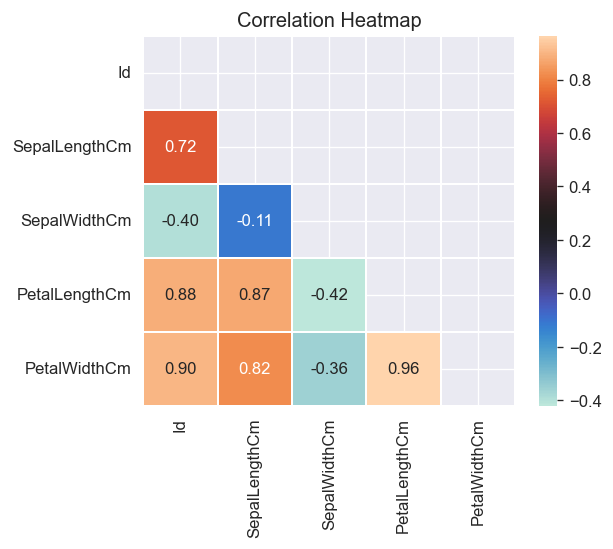

In [11]:
plt.figure(dpi = 120,figsize= (5,4))
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap='icefire')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> drop id column </div>

In [12]:
df=df.drop(columns=["Id"])
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Converting class labels into numerical form </div>

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> Exploratory Data Analysis (EDA) </div>

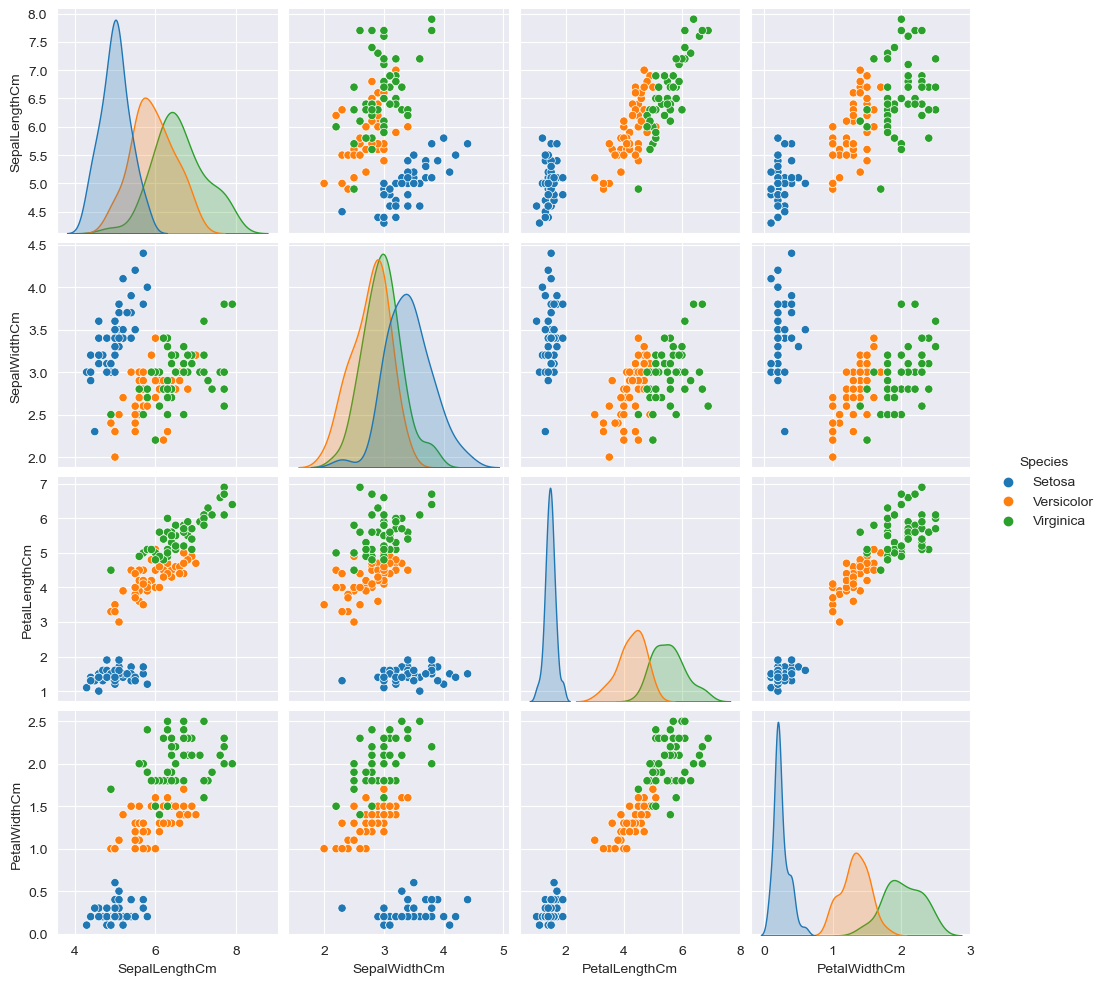

In [14]:
hue_mapping = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['Species'] = df['Species'].map(hue_mapping)
sns.pairplot(df,hue='Species')
plt.show()

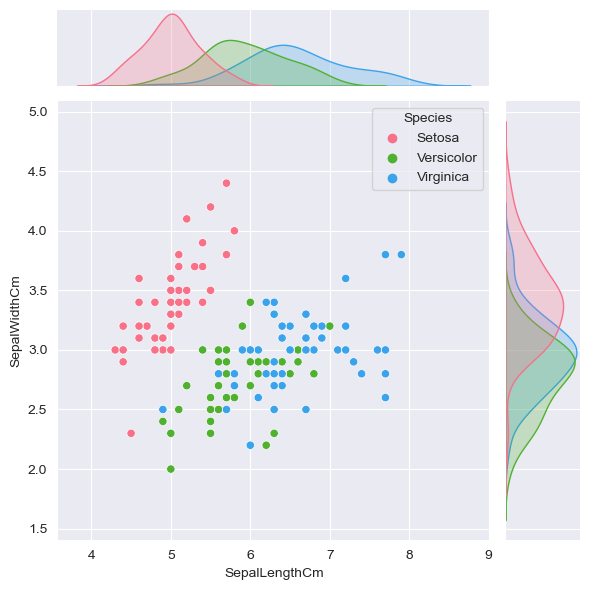

In [15]:
# Custom color palette
custom_palette = sns.color_palette("husl", 3)  # You can choose a different palette

# Create jointplot with custom palette
sns.jointplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=custom_palette)
plt.show()

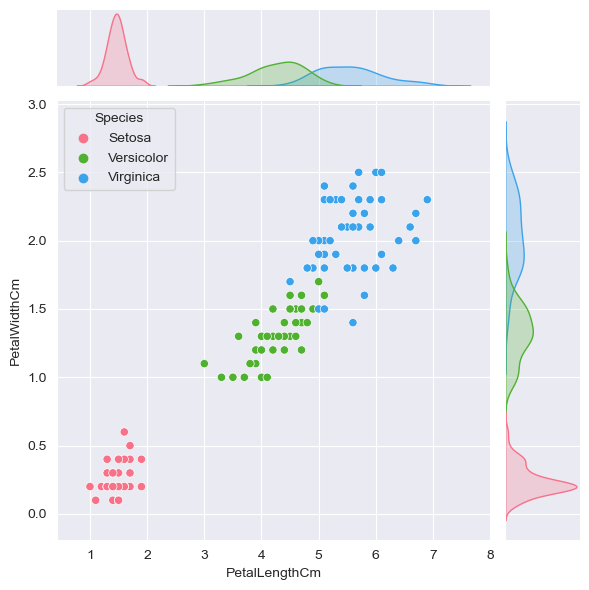

In [16]:
# Custom color palette
custom_palette = sns.color_palette("husl", 3)  # You can choose a different palette

# Create jointplot with custom palette
sns.jointplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=custom_palette)
plt.show()

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

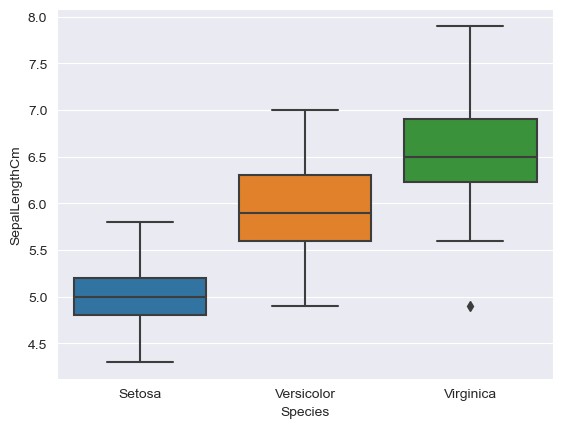

In [17]:
sns.boxplot(x="Species", y="SepalLengthCm", data=df)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

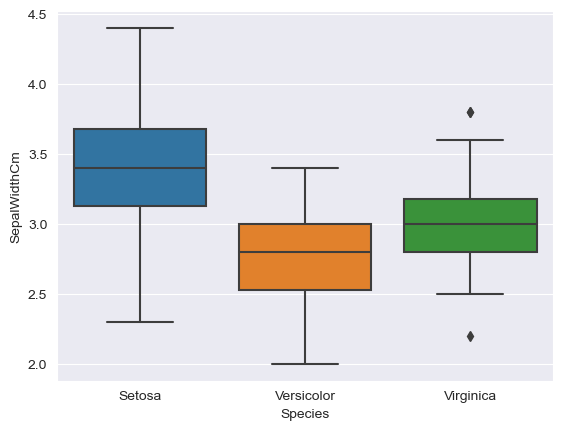

In [18]:
sns.boxplot(x="Species", y="SepalWidthCm", data=df)

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

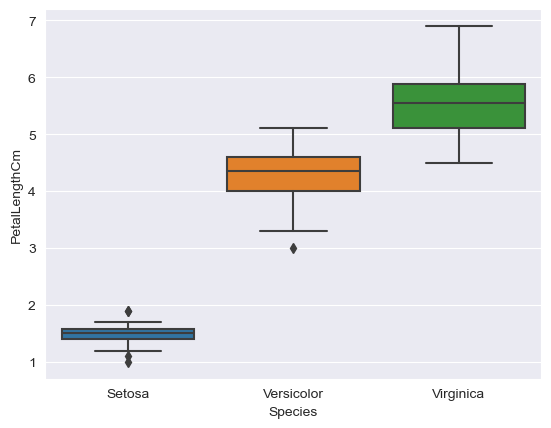

In [19]:
sns.boxplot(x="Species", y="PetalLengthCm", data=df)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

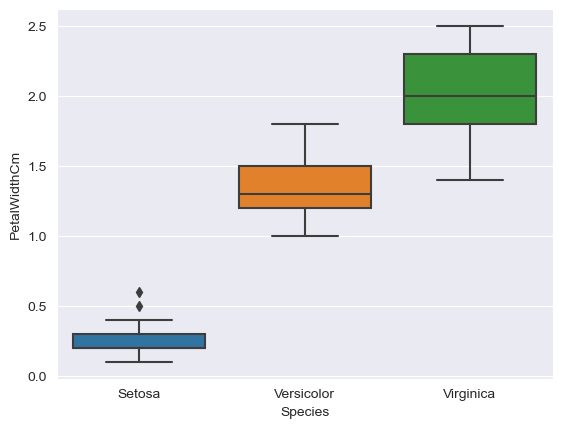

In [20]:
sns.boxplot(x="Species", y="PetalWidthCm", data=df)

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">model building</div>

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">1st model</div>

In [21]:
x = df.drop(columns=['Species'])
y = df['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Logistic Regression Model</div>

In [22]:
# Logistic Regression Model
model1 = LogisticRegression()
model1.fit(x_train, y_train)
y_pred_logreg = model1.predict(x_test)


Logistic Regression:
Accuracy:  97.77777777777777
Precision:  0.9793650793650793
Recall:  0.9777777777777777
F1 Score:  0.9778718400940623


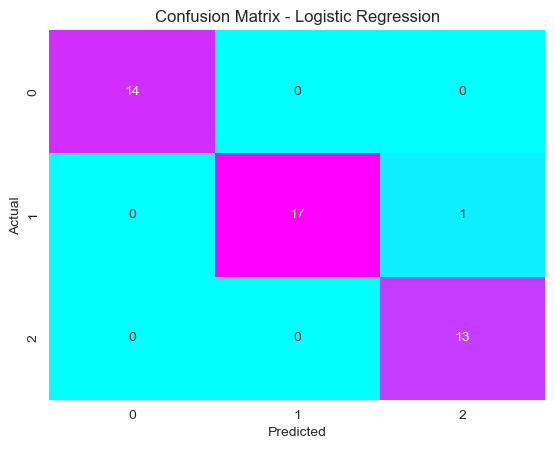

In [23]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="cool", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Logistic Regression Model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg) * 100
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

print("Logistic Regression:")
print("Accuracy: ", accuracy_logreg)
print("Precision: ", precision_logreg)
print("Recall: ", recall_logreg)
print("F1 Score: ", f1_logreg)
plot_confusion_matrix(conf_matrix_logreg, "Confusion Matrix - Logistic Regression")

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">K-nearest Neighbours Model</div>

In [24]:
# K-nearest Neighbours Model (KNN)
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
y_pred_knn = model2.predict(x_test)



K-nearest Neighbours (KNN):
Accuracy:  97.77777777777777
Precision:  0.9789473684210527
Recall:  0.9777777777777777
F1 Score:  0.9776336336336338


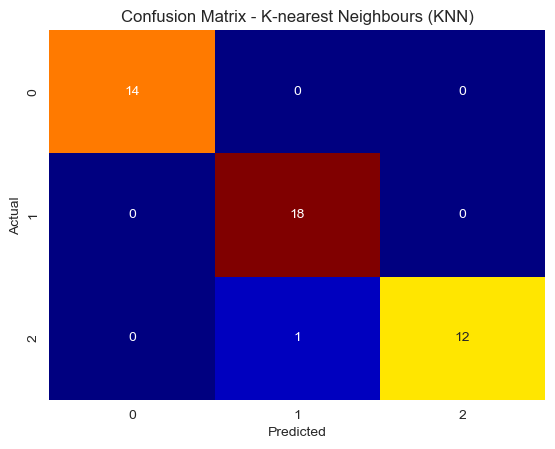

In [25]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="jet", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# Evaluate K-nearest Neighbours Model (KNN)
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("\nK-nearest Neighbours (KNN):")
print("Accuracy: ", accuracy_knn)
print("Precision: ", precision_knn)
print("Recall: ", recall_knn)
print("F1 Score: ", f1_knn)
plot_confusion_matrix(conf_matrix_knn, "Confusion Matrix - K-nearest Neighbours (KNN)")

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">Decision Tree Model</div>

In [26]:
# Decision Tree Model
model3 = DecisionTreeClassifier()
model3.fit(x_train, y_train)
y_pred_decision_tree = model3.predict(x_test)



Decision Tree:
Accuracy:  95.55555555555556
Precision:  0.9555555555555556
Recall:  0.9555555555555556
F1 Score:  0.9555555555555556


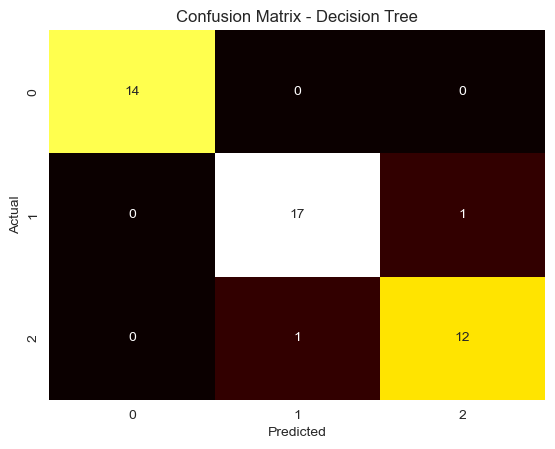

In [27]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="hot", cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate Decision Tree Model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree) * 100
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='weighted')
conf_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

print("\nDecision Tree:")
print("Accuracy: ", accuracy_decision_tree)
print("Precision: ", precision_decision_tree)
print("Recall: ", recall_decision_tree)
print("F1 Score: ", f1_decision_tree)
plot_confusion_matrix(conf_matrix_decision_tree, "Confusion Matrix - Decision Tree")

## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20"> model evaluation and selecting best model based on accuracy </div>

In [28]:
import pandas as pd

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-nearest Neighbours (KNN)', 'Decision Tree'],
    'Accuracy': [accuracy_logreg, accuracy_knn, accuracy_decision_tree],
    'Precision': [precision_logreg, precision_knn, precision_decision_tree],
    'Recall': [recall_logreg, recall_knn, recall_decision_tree],
    'F1 Score': [f1_logreg, f1_knn, f1_decision_tree]
})

# Display the summary dataframe
print(summary_df)

# Identify the best model based on a specific metric (e.g., Accuracy)
best_model = summary_df.loc[summary_df['Accuracy'].idxmax(), 'Model']
print("\nBest Model based on Accuracy:", best_model)


                        Model   Accuracy  Precision    Recall  F1 Score
0         Logistic Regression  97.777778   0.979365  0.977778  0.977872
1  K-nearest Neighbours (KNN)  97.777778   0.978947  0.977778  0.977634
2               Decision Tree  95.555556   0.955556  0.955556  0.955556

Best Model based on Accuracy: Logistic Regression


## <div style="background-color:#s3C130;font-size:20px;padding:10px 10px;color:black;border:4px solid #1C1B20">predicting species for new value </div>

In [37]:
# Logistic Regression is the best model
best_model = LogisticRegression()
best_model.fit(x_train, y_train)

# Get user input for feature values
value1 = float(input("Enter the value for SepalLengthCm: "))
value2 = float(input("Enter the value for SepalWidthCm: "))
value3 = float(input("Enter the value for PetalLengthCm: "))
value4 = float(input("Enter the value for PetalWidthCm: "))

new_data = pd.DataFrame({
    'SepalLengthCm': [value1],
    'SepalWidthCm': [value2],
    'PetalLengthCm': [value3],
    'PetalWidthCm': [value4],
})

# Make predictions on the new data
new_prediction = best_model.predict(new_data)

print("Predicted Class:", new_prediction[0])

# Assuming you have the actual class for comparison
actual_class = best_model.predict(x_test.head(1))  # Replace with the actual test data
print("Actual Class:", actual_class[0])

Enter the value for SepalLengthCm: 4
Enter the value for SepalWidthCm: 3.2
Enter the value for PetalLengthCm: 1.4
Enter the value for PetalWidthCm: 1.5
Predicted Class: Setosa
Actual Class: Setosa
